In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.fftpack import fft,ifft

In [2]:
body_acc_x = pd.read_csv('../testData/body_acc_x_test.txt', delim_whitespace=True, header=None).to_numpy()
y = pd.read_csv('../testData/y_test.txt', delim_whitespace=True, header=None).to_numpy()

In [3]:
def showplot(data, after):
    plt.subplots_adjust(bottom=1, top=4, right=1)
    plt.subplot(311)
    plt.plot(data)
    plt.title('before FFT')
    plt.subplot(312)
    plt.plot(after)
    plt.title('after FFT')
    plt.subplot(313)
    plt.plot(data)
    plt.title('mixed')
    plt.plot(after)
    plt.show()

index:  1895 	y:  4 



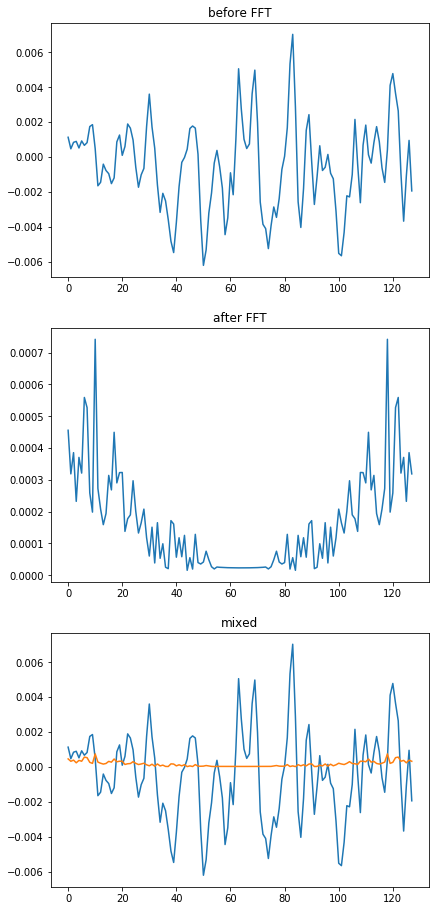

In [4]:
index = random.randint(0,2947)
data = body_acc_x[index]
n = len(data)
print('index: ',index, '\ty: ', y[index][0], '\n')

after = abs(fft(body_acc_x)[index])/n
showplot(data,after)